# Mathematics Form & Function: Chapter 9 - Mechanics

## 1. Kepler's Laws

The laws:

1. The planets describe orbits in a plane containing the sun, in such a way that areas swept out in equal times are equal.
2. Each planetary orbit is an ellipse with the sun at one focus.
3. The square of the period of each planet in its orbit is proportional to the length of the major axis of the ellipse.

In [1]:
import numpy as np

def force(mass, acceleration):
    """ Newton's 2nd law. """
    return mass * acceleration

print(force(2, np.array([2, 3, 4])))
print(force(5, np.array([2, 3, 4])))
print(force(10, np.array([2, 3, 4])))

[4 6 8]
[10 15 20]
[20 30 40]


In [2]:
from sympy.abc import F, a, m
from sympy.physics.mechanics import Particle
from sympy.physics.mechanics import Point

m = 2
#po = Point('a').set_pos([0, 0, 0]).set_vel([2, 3, 4])
#pa = Particle("pa", po, m)

In [3]:
def inverse_square_law(m1, m2, r):
    """
    The inverse square law returns the magnitude of a gravitational force.
    
    m1 = a mass
    m2 = another mass
    r  = the distance in a straight line between masses.
    """
    constant = 1 # the gravitational constant
    return constant * ((m1 * m2) / r**2)

print(inverse_square_law(2, 3, 2))
print(inverse_square_law(2, 3, 4))
print(inverse_square_law(2, 3, 6))
print(inverse_square_law(3, 3, 6))
print(inverse_square_law(3, 4, 6))

1.5
0.375
0.16666666666666666
0.25
0.3333333333333333


In [4]:
import math

def newtons_2nd_law_plane(F, theta):
    """
    Newton's 2nd law taking polar coordinates.
    
    F - a magnitude of force
    theta - the angle from y == 0
    """
    mx = -F * math.cos(theta)
    my = -F * math.sin(theta)
    return [mx, my]

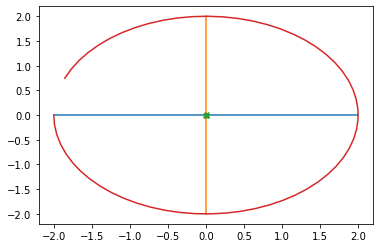

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

coords = []
for i in np.arange(0, 6, .1):
    coords.append(newtons_2nd_law_plane(2, i))

df = pd.DataFrame(columns = ['x', 'y'], data = np.array(coords))

plt.plot([-2, 2], [0, 0])
plt.plot([0, 0], [-2, 2])
plt.plot(0, 0, 'X')
plt.plot(df['x'], df['y'])
plt.show()

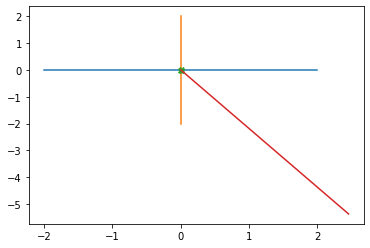

In [6]:
coords = []
for i in np.arange(0, 6, .1):
    coords.append(newtons_2nd_law_plane(i, 2))

df = pd.DataFrame(columns = ['x', 'y'], data = np.array(coords))

plt.plot([-2, 2], [0, 0])
plt.plot([0, 0], [-2, 2])
plt.plot(0, 0, 'X')
plt.plot(df['x'], df['y'])
plt.show()

In [7]:
F = 10
theta = 3
r = 5
mx = -F * math.cos(theta)
my = -F * math.sin(theta)

x = r * math.cos(theta)
y = r * math.sin(theta)

# The following states that the time derivate of the 1st deritive of y * x,
# minus the 1st derivative of x * y is equal to zero
(mx * y) - (my * x) == 0

True

In [8]:
def angular_momentum_polar(m, r, theta):
    """
    The angular momemuntum in polar coordinates.
    
    m = mass
    r = distance from the zero point
    theta = angular velocity about 0
    """
    return m * r**2 * theta

# Increasing the angle
print(angular_momentum_polar(2, 2, 1))
print(angular_momentum_polar(2, 2, 2))
print(angular_momentum_polar(2, 2, 3))

8
16
24


In [9]:
# Increasing the mass
print(angular_momentum_polar(1, 2, 2))
print(angular_momentum_polar(2, 2, 2))
print(angular_momentum_polar(3, 2, 2))

8
16
24


In [10]:
# Increasing the distance
print(angular_momentum_polar(2, 1, 2))
print(angular_momentum_polar(2, 2, 2))
print(angular_momentum_polar(2, 3, 2))

4
16
36


In [11]:
def area_swept_by_radius(r, theta):
    """ Defines the area that is swept by a radius vector.
    
    r - distance from 0 point to object
    theta - the change in angle
    """
    return .5 * r**2 * theta

print(area_swept_by_radius(5, 1))
print(area_swept_by_radius(5, 3))
print(area_swept_by_radius(5, 6))

12.5
37.5
75.0


In [12]:
def equation_orbit_polar(k, mu, x, y, A, B):
    """
    The equation of an orbit in polar terms:
    
    k - constant of angular momentum
    mu - constant
    x - coordinate
    y - coordinate
    A - constant of integration
    B - constant of integration
    """
    return k**2 / (mu - (x * B) - (y * A))

> When velocity and acceleration are represented by derivatives, as defined in the Calculus, then Kepler's laws, summarizing the obvserations of the positions of the planets, can be deduced from Newton's second law of motion and the inverse square law of gravitation.

---

## 2. Momentum, Work, and Energy

In [13]:
def linear_momentum_3d(mass, vector):
    """ Returns the momentum in 3 dimensions given mass & vector velocity.
    
    mass -- the mass of an object
    vector -- a tuple of 3d coordinates
    """
    x1, x2, x3 = vector
    return (mass * x1, mass * x2, mass * x3)

print(linear_momentum_3d(5, (2, 3, 2)))

(10, 15, 10)


In [14]:
def work_3d(force, displacement):
    """ Defines the work by inner product of force & displacement.
    
    force -- a 3d vector
    displacement -- a 3d vector
    """
    work = 0
    for i in range(0, 3):
        work += force[i] * displacement[i]
    return work

print(work_3d([2, 3, 2], [0, 2, 2]))

10


In [15]:
def kinetic_energy_3d(mass, vector):
    """ Defines the kinetic energy of a particle in 3d.
    
    mass -- a scalar
    vector -- 3d coordinates as a tuple
    """
    x1, x2, x3 = vector
    return .5 * mass * (x1**2 + x2**2 + x3**2)
    
print(kinetic_energy_3d(5, (2, 3, 2)))

42.5


In [16]:
def magnitude_vector_3d(vector):
    """ Return the magnitude. """
    x1, x2, x3 = vector
    return math.sqrt(x1**2 + x2**2 + x3**2)

print(magnitude_vector_3d((2, 3, 3)))

4.69041575982343


In [17]:
# Checking a simplified definition of the kinetic energy:
# (1/2) * mass * magnitude of the vector squared

print(.5 * 5 * magnitude_vector_3d((2, 3, 2))**2)

42.5


In [18]:
def potential_energy(lamb, mass, radius):
    """ Defines the potential energy of a particle at a distance from another.
    
    lamb -- the constant of gravity
    mass -- the mass of the attracting particle
    radius -- the distance between the particles
    """
    return (-lamb) * (mass / radius)

print(potential_energy(1, 2, 5))

-0.4


In [19]:
def potential(lamb, radius):
    """ Defines the potential.
    
    lamb -- the constant of gravity
    radius -- the distance between particles
    """
    return (-lamb) / radius

print(potential(1, 5))

-0.2


---

## 3. Lagrange's Equations

In [20]:
def x_loc(r_now, theta_deg):
    """ x location from polar coordinates 
    
    Keyword arguments:
    r_now -- radius at a point in time
    theta_deg -- the given angle in radians
    """
    return r_now * math.cos(theta_deg)

def y_loc(r_now, theta_deg):
    """ y location from polar coordinates 
    
    Keyword arguments:
    r_now -- radius at a point in time
    theta_deg -- the given angle in radians
    """
    return r_now * math.sin(theta_deg)

def x_vel(r_now, r_vel, theta_deg, theta_vel):
    """ The velocity on x dimension.
    
    Keyword arguments:
    r_now -- radius at a point in time
    r_vel -- the change in radius
    theta_deg -- the given angle in radians
    theta_vel -- the change in angle
    """
    y_location = y_loc(r_now, theta_deg)
    change_in_y = -(y_location) * theta_vel
    change_in_x = math.cos(theta_deg) * r_vel
    return change_in_y + change_in_x

def y_vel(r_now, r_vel, theta_deg, theta_vel):
    """ The velocity on x dimension.
    
    Keyword arguments:
    r_now -- radius at a point in time
    r_vel -- the change in radius
    theta_deg -- the given angle in radians
    theta_vel -- the change in angle
    """
    x_location = x_loc(r_now, theta_deg)
    change_in_x = x_location * theta_vel
    change_in_y = math.sin(theta_deg) * r_vel
    return change_in_x + change_in_y

In [21]:
print("x axis: " + str(math.cos(1)))
print("y axis: " + str(math.sin(1)))

x axis: 0.5403023058681398
y axis: 0.8414709848078965


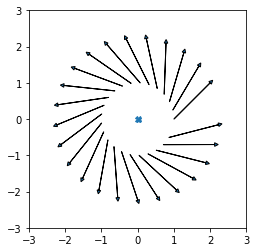

In [22]:
r = 1 # radius
r_vel = 1
theta_vel = 1

ax = plt.axes()

for i in np.arange(0, 6, .25):
    ax.arrow(
        x_loc(r, i),
        y_loc(r, i),
        x_vel(r, r_vel, i, theta_vel),
        y_vel(r, r_vel, i, theta_vel),
        head_width = 0.1,
        head_length = 0.1
    )

plt.axis('square')
plt.plot(0, 0, 'X')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [23]:
def kinetic_energy_1(m, x_vel, y_vel):
    return .5 * m * (x_vel**2 + y_vel**2)

tmp_x_vel = x_vel(1, r_vel, .25, theta_vel)
tmp_y_vel = y_vel(1, r_vel, .25, theta_vel)

T1 = kinetic_energy_1(3, tmp_x_vel, tmp_y_vel)
print(T1)

2.999999999999999


In [24]:
def kinetic_energy_2(m, r, theta_vel, r_vel):
    return .5 * m * (r**2 * theta_vel**2 + r_vel**2)

T2 = kinetic_energy_2(3, 1, theta_vel, r_vel)
print(T2)

3.0


In [25]:
np.isclose(T1, T2)

True

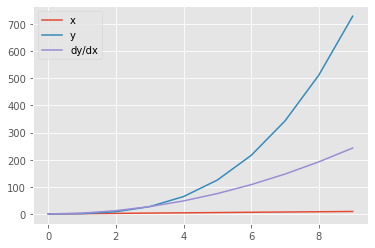

 x    y  dy/dx
 0    0      0
 1    1      3
 2    8     12
 3   27     27
 4   64     48
 5  125     75
 6  216    108
 7  343    147
 8  512    192
 9  729    243


In [26]:
n = 3
rng = range(0, 10)

dic = {
    'x' : [x for x in rng],
    'y' : [x**n for x in rng],
    'dy/dx' : [n * (x**(n-1)) for x in rng]
}

df = pd.DataFrame(dic)

plt.style.use('ggplot')
plt.plot(df)
plt.legend(df.columns)
plt.show()
print(df.to_string(index = False))

In [27]:
def lagrange_equation(k_energy, q_loc, q_vel):
    """ The Lagrange equation with kinetic energy for coordinate q. """
    partial_derivative_q_vel = k_energy / q_vel
    partial_derivative_q_loc = k_energy / q_loc
    Qq = partial_derivative_q_vel - partial_derivative_q_loc
    return Qq

print(lagrange_equation(1, 5, 2))

0.3


> This Lagrange equation does include the polar coordinate equations ... for the coordinates $r$ and $\theta$. The miracle is that this one form of equation applies to any choice of coordinate system. This exemplifies the observation that one Mathematical form has many realizations.

> The Lagrange equations apply also to the case of motion under constraints - for example a so called "holonomic" constraint, where a particle or particles is required (i.e. is constrained) to move only along some curve or surface in Euclidean space. An example is a sphere rolling along a smooth table or a pendulum where the pendulum's bob is suspended by a weightless string from some fixed point 0. Then the motion of the bob is just the motion of a point on a sphere, and so can be described in terms of coordinates on the sphere - say the latitude and longitude.

For cases of holonomic constraint, there are 2 types of forces:

- $F^c$ Forces of constraint:
    - orthogonal to the submanifold
    - these do no work
- $F^e$ External forces

In [28]:
def pendulum_potential(mass, gravity, radius, theta):
    """ Calculate potential energy of pendulum. """
    return -mass * gravity * radius * math.cos(theta)

print(pendulum_potential(5, 1, 2, .2))
print(pendulum_potential(5, 1, 2, .1))
print(pendulum_potential(5, 1, 2, 0))
print(pendulum_potential(5, 1, 2, -.1))
print(pendulum_potential(5, 1, 2, -.2))

-9.800665778412416
-9.950041652780259
-10.0
-9.950041652780259
-9.800665778412416


In [29]:
def pendulum_kinetic(mass, radius, theta_vel):
    """ Calculate kinetic energy of pendulum. """
    return (mass * radius**2 * theta_vel**2) / 2

print(pendulum_kinetic(5, 2, 1))

10.0


---

## 4. Velocities & Tangent Bundles

> The phase space for simple harmonic motion exhibited both position and velocity. Similarly the quantities $q^i$ (position) and $\dot{q}^i$ (velocity) are the coordinates for the *phase space* of the motion. A point in this space is a point in the configuration space $C$ plus a tangent vector at that point. In other words, it is a point on the tangent bundle $B.C$ to $C$ - which we write with the letter $B$, to avoid confusion with the use of the letter $T$ for kinetic energy. Thus the device of thinking of a point moving in such a phase space is really equivalent ot the geometric idea of using a tangent bundle to a manifold.

---

## 5. Mechanics in Mathematics

> ... a particular idea may arise first in Physics or first in Mathematics or often with apparent independence in both. At issue is not the question of which comes first, but the remarkable fact that both come - that ideas from physical problems and from apparently pure Mathematical speculation come together.

---

## 6. Hamilton's Principle

> Hamilton's principle asserts that the solutions of Lagrange's equations are exactly those paths in $C$ which "minimize" the integral of the Lagrangian function $L$ along the path.

> **Hamilton's Principle.** For each time-dependent smooth Lagrangian function $L$ on a manifold $C$, a path $u: I \rightarrow C$ from a point $a$ to a point $b$ satisfies Lagrange's equations for $L$ if and only if the corresponding integral $J(u)$ of the Lagrangian is stationary at $u$.

> **Lemma.** *If $M: I \rightarrow \textbf{R}$ is a smooth function of $t$ for which*

$$
\int_{0}^{1} M\eta dt = 0
$$

> *for every smooth $\eta: I \rightarrow \textbf{R}$ with $\eta(0) = \eta(1) = 0$, then $M$ is identically zero.*

> The explanation of the invariant form of Lagrange's equations depends on minimizing a suitable integral over families of curves, and is intimately tied to the development of the Calculus of Variations - which is recent times has reappeared as the theory of optimal control.

---

## 7. Hamilton's Equations

The *Hamiltonian*, considered as a function of position and momentum is total energy:

$$
H = T + V
$$

In [30]:
def hamiltonian(ps, q_dots, L):
    """ A definition of the Hamiltonian.
    
    Keyword arguments:
    ps -- the coordiates
    q_dots -- the momenta (velocity)
    L -- the Lagrangian
    """
    if len(ps) != len(q_dots):
        print("Coordinates & Momenta are not same length.")
        return
    H = 0
    for i in range(0, len(ps)):
        H += ps[i] * q_dots[i] - L
    return H

> ... the Legendre transformation $\theta$ replacing the $\dot{q}^i$ by the $p_i$ is, on each tangent space $B_xC = W$, just the canonical isomorphism from the inner product space $W$ to its dual $W^*$. In this way, the Riemann metric given by the kinetic energy determines, via duality, the Legendre transformation.

---

## 8. Tricks versus Ideas

> Effective or tricky formal manipulations are introduced by Mathematicians who doubtless have a guiding idea - but it is easier to state the manipulations than it is to formulate the idea in words. Just as the same idea can be realized in different forms, so can the same formal success be understood by a variety of ideas. A perpicuous exposition of a piece of Mathematics would let the ideas shine through the display of manipulations.

---

## 9. The Principal Function

> A conservative mechanical system with Legrangian $L$ determines a "principal function" $S$ as the integral of $L$ along the trajectories. As a function of time and the end-point of the trajectory, $S$ satisfies the Hamilton-Jacobi (HJ) partial differential equation. Conversely ... suitable solutions of the HJPDE give the trajectories, often called the *characteristics* of the P.D.E. This is a first indication of the important of P.D.E. in mechanics (and also in quantum mechanics" ...

---

## 10. The Hamilton-Jacobi Equation

In [38]:
from sympy import *
#from sympy import Derivative
#from sympy import Eq
#from sympy import Function
#from sympy import symbols

u = Function('u')
c, t, x = symbols('c t x')

lhs = Derivative(u(x, t), t, t)
rhs = c**2 * Derivative(u(x, t), x, x)

wave_fn = Eq(lhs, rhs)
wave_fn

Eq(Derivative(u(x, t), (t, 2)), c**2*Derivative(u(x, t), (x, 2)))

In [40]:
H = Function('H')
S = Function('S')
q, t = symbols('q t')

fn = Derivative(S(t), t) + H(q, Derivative(S(q), q), t)
hamilton_jacobi = Eq(fn, 0)
hamilton_jacobi

Eq(H(q, Derivative(S(q), q), t) + Derivative(S(t), t), 0)

---

## 11. The Spinning Top

The following are Euler's angles:

> These three angles

$$
0 \le \phi \le 2\pi, 0 \le \theta \le \pi \quad \textrm{and} \quad 0 \le \psi \le 2\pi
$$

> suffice to describe completeley the position of the top - or the rotation of any rigid body about a fixed point. They are called *Euler's angles*. They are the local coordinates in a configuration space $C$ - but they are not global coordinates.

In [58]:
theta, omega = symbols("theta omega")
fnc = Derivative(theta, t)
fnc

Derivative(theta, t)

In [61]:
exp = Eq(omega, fnc)
exp

Eq(omega, Derivative(theta, t))

---

## 12. The Form of Mechanics

Steps in formalism of Mathematics in regards to motion:

1. Qualitative descriptions of motion
2. Quantative descriptions of motion
3. Deduction of empirical laws (Kepler's laws)
4. Deduction of empirical regularities from formal rules (Mathematics enters here)
5. Prediction of phenonema from these formal rules
6. Formal rules derived from a conceptual background also derived from experience
7. Such rules & ideas expand outward into other aspects of Mathematics

---

## 13. Quantum Mechanics

There is also a role for the Hamilton-Jacobi equation in quantum mechanics.

The equation is connected to the classical wave equation & for this reason some early versions of quantum mechanics were known as wave mechanics.  But the relationship is deeper & subtly connected with the classical wave equations at the origin of the Hamilton-Jacobi theorem.